In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses,Input
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras.datasets import mnist,cifar10
from tensorflow.keras.models import Model
from keras import regularizers

In [16]:
(x_train, _), (x_test, _) = cifar10.load_data()
x_for_dalle = x_train[:1000]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 3072))
x_test = np.reshape(x_test, (len(x_test), 3072))

In [3]:
input_img = Input(shape=(3072,))
# Add a Dense layer with a L1 activity regularizer

encoded = Dense(1024, activation='relu',activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(3072, activation='sigmoid')(encoded)

In [4]:
loss_dict = {"adam":0.0,"rmsprop":0.0,"adadelta":0.0,"adagrad":0.0,"nadam":0.0,"sgd":0.0}
def train_model(input_layer,output_layer,optimizer,epochs,batch_size):
    autoencoder = Model(input_layer,output_layer)
    autoencoder.compile(optimizer=optimizer,loss = "binary_crossentropy",metrics = ["mean_squared_error"])
#     print(autoencoder.summary())
    print("With", optimizer,"optimizer")
    hist = autoencoder.fit(x_train,x_train,epochs = epochs,batch_size = batch_size,validation_data = (x_test,x_test))
    loss_dict[optimizer] = hist.history["val_loss"][-1]
    decoded_images = autoencoder.predict(x_test)
    n = 10
    plt.figure(figsize=(20, 6))
    for i in range(1, n + 1):
        # Display original
        ax = plt.subplot(2, n, i)
        plt.imshow(x_test[i].reshape(32, 32,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # Display reconstruction
        ax = plt.subplot(2, n, i + n)
        plt.imshow(decoded_images[i].reshape(32, 32,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

With adam optimizer
Epoch 1/10
391/391 [==============================] - 6s 8ms/step - loss: 0.6395 - mean_squared_error: 0.0369 - val_loss: 0.6241 - val_mean_squared_error: 0.0292
Epoch 2/10
391/391 [==============================] - 3s 7ms/step - loss: 0.6154 - mean_squared_error: 0.0256 - val_loss: 0.6107 - val_mean_squared_error: 0.0230
Epoch 3/10
391/391 [==============================] - 3s 6ms/step - loss: 0.6070 - mean_squared_error: 0.0220 - val_loss: 0.6041 - val_mean_squared_error: 0.0204
Epoch 4/10
391/391 [==============================] - 3s 7ms/step - loss: 0.6022 - mean_squared_error: 0.0200 - val_loss: 0.6005 - val_mean_squared_error: 0.0190
Epoch 5/10
391/391 [==============================] - 3s 7ms/step - loss: 0.5991 - mean_squared_error: 0.0188 - val_loss: 0.5992 - val_mean_squared_error: 0.0186
Epoch 6/10
391/391 [==============================] - 3s 7ms/step - loss: 0.5979 - mean_squared_error: 0.0185 - val_loss: 0.5980 - val_mean_squared_error: 0.0183
Epoch 7/

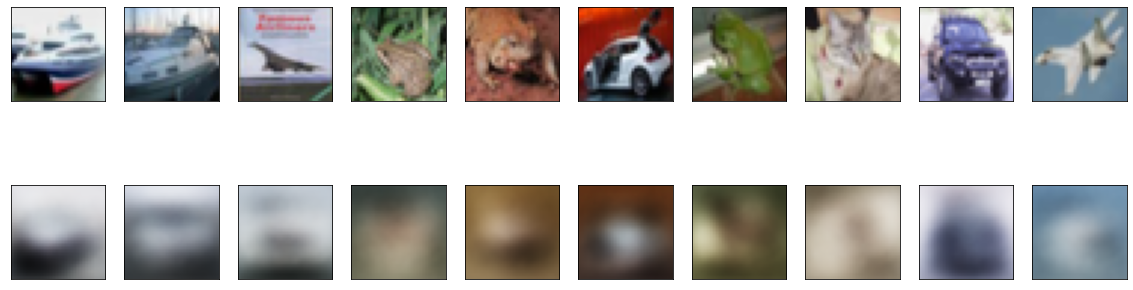

With rmsprop optimizer
Epoch 1/10
391/391 [==============================] - 4s 9ms/step - loss: 0.6346 - mean_squared_error: 0.0345 - val_loss: 0.6152 - val_mean_squared_error: 0.0264
Epoch 2/10
391/391 [==============================] - 3s 8ms/step - loss: 0.6187 - mean_squared_error: 0.0282 - val_loss: 0.6151 - val_mean_squared_error: 0.0263
Epoch 3/10
391/391 [==============================] - 3s 7ms/step - loss: 0.6155 - mean_squared_error: 0.0266 - val_loss: 0.6128 - val_mean_squared_error: 0.0248
Epoch 4/10
391/391 [==============================] - 3s 7ms/step - loss: 0.6132 - mean_squared_error: 0.0254 - val_loss: 0.6098 - val_mean_squared_error: 0.0236
Epoch 5/10
391/391 [==============================] - 3s 7ms/step - loss: 0.6116 - mean_squared_error: 0.0246 - val_loss: 0.6061 - val_mean_squared_error: 0.0216
Epoch 6/10
391/391 [==============================] - 3s 8ms/step - loss: 0.6104 - mean_squared_error: 0.0239 - val_loss: 0.6102 - val_mean_squared_error: 0.0232
Epoch

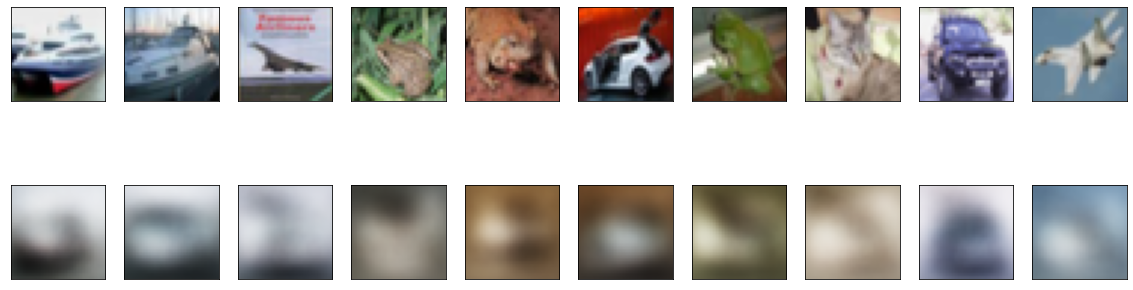

With nadam optimizer
Epoch 1/10
391/391 [==============================] - 5s 11ms/step - loss: 0.6023 - mean_squared_error: 0.0199 - val_loss: 0.6079 - val_mean_squared_error: 0.0223
Epoch 2/10
391/391 [==============================] - 4s 10ms/step - loss: 0.6015 - mean_squared_error: 0.0197 - val_loss: 0.6007 - val_mean_squared_error: 0.0189
Epoch 3/10
391/391 [==============================] - 4s 11ms/step - loss: 0.6008 - mean_squared_error: 0.0195 - val_loss: 0.6000 - val_mean_squared_error: 0.0189
Epoch 4/10
391/391 [==============================] - 4s 11ms/step - loss: 0.6001 - mean_squared_error: 0.0192 - val_loss: 0.6003 - val_mean_squared_error: 0.0188
Epoch 5/10
391/391 [==============================] - 5s 12ms/step - loss: 0.5998 - mean_squared_error: 0.0191 - val_loss: 0.6007 - val_mean_squared_error: 0.0193
Epoch 6/10
391/391 [==============================] - 4s 11ms/step - loss: 0.5995 - mean_squared_error: 0.0190 - val_loss: 0.6012 - val_mean_squared_error: 0.0196
E

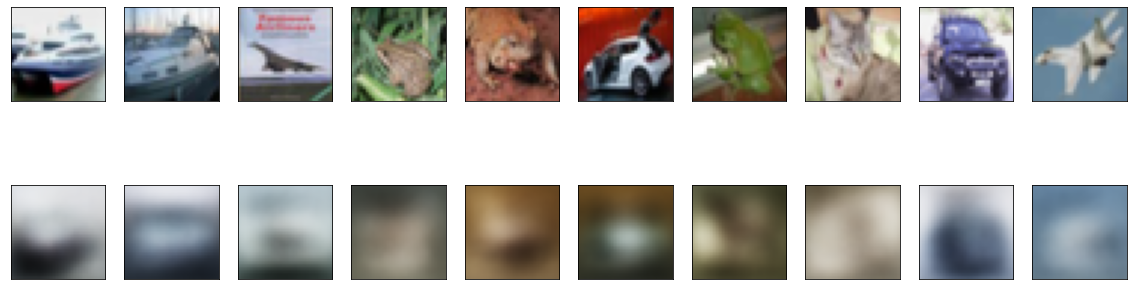

With sgd optimizer
Epoch 1/10
391/391 [==============================] - 3s 6ms/step - loss: 0.5958 - mean_squared_error: 0.0176 - val_loss: 0.5968 - val_mean_squared_error: 0.0177
Epoch 2/10
391/391 [==============================] - 2s 5ms/step - loss: 0.5957 - mean_squared_error: 0.0176 - val_loss: 0.5967 - val_mean_squared_error: 0.0177
Epoch 3/10
391/391 [==============================] - 2s 5ms/step - loss: 0.5957 - mean_squared_error: 0.0176 - val_loss: 0.5967 - val_mean_squared_error: 0.0177
Epoch 4/10
391/391 [==============================] - 2s 5ms/step - loss: 0.5957 - mean_squared_error: 0.0176 - val_loss: 0.5967 - val_mean_squared_error: 0.0177
Epoch 5/10
391/391 [==============================] - 2s 5ms/step - loss: 0.5957 - mean_squared_error: 0.0176 - val_loss: 0.5967 - val_mean_squared_error: 0.0177
Epoch 6/10
391/391 [==============================] - 2s 6ms/step - loss: 0.5957 - mean_squared_error: 0.0176 - val_loss: 0.5967 - val_mean_squared_error: 0.0177
Epoch 7/1

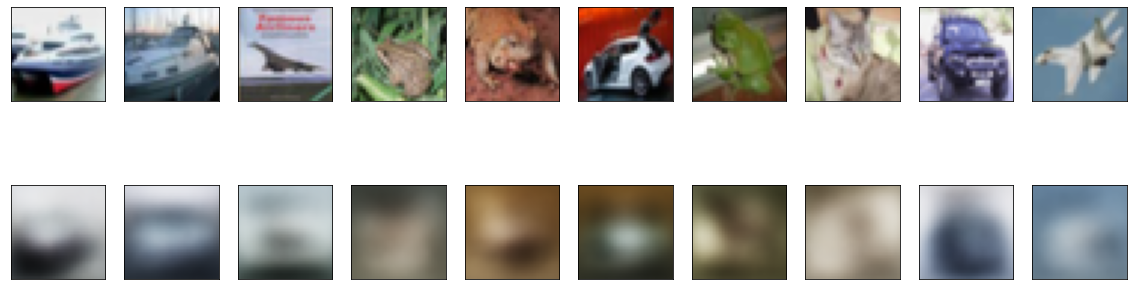

In [5]:
for i in ["adam","rmsprop","nadam","sgd"]:
        train_model(input_img,decoded,i,10,128)

In [57]:
import io
import os, sys
import requests
import PIL

import torch
import torchvision.transforms as T
import torchvision.transforms.functional as TF

from dall_e          import map_pixels, unmap_pixels, load_model
from IPython.display import display, display_markdown

target_image_size = 300

def download_image(url):
    resp = requests.get(url)
    resp.raise_for_status()
    return PIL.Image.open(io.BytesIO(resp.content))

def preprocess(img):
    s = min(img.size)
    
    if s < target_image_size:
        raise ValueError(f'min dim for image {s} < {target_image_size}')
        
    r = target_image_size / s
    s = (round(r * img.size[1]), round(r * img.size[0]))
    img = TF.resize(img, s, interpolation=PIL.Image.LANCZOS)
    img = TF.center_crop(img, output_size=2 * [target_image_size])
    img = torch.unsqueeze(T.ToTensor()(img), 0)
    return map_pixels(img)

In [58]:
# !wget https://cdn.openai.com/dall-e/encoder.pkl

In [59]:
# !wget https://cdn.openai.com/dall-e/decoder.pkl

In [60]:
dev = torch.device('cpu')

# For faster load times, download these files locally and use the local paths instead.
enc = load_model("encoder.pkl", dev)
dec = load_model("decoder.pkl", dev)

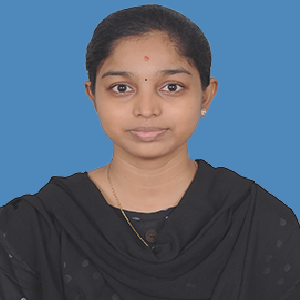

In [61]:
x = preprocess(download_image('https://www.sret.edu.in/images/Faculty/newImage/ramya.png'))
display_markdown('Original image:')
display(T.ToPILImage(mode='RGB')(x[0]))


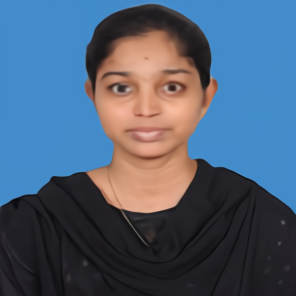

In [62]:
import torch.nn.functional as F

z_logits = enc(x)
z = torch.argmax(z_logits, axis=1)
z2 =z
z = F.one_hot(z, num_classes=enc.vocab_size).permute(0, 3, 1, 2).float()

x_stats = dec(z).float()
x_rec = unmap_pixels(torch.sigmoid(x_stats[:, :3]))
x_show = x_rec[0]
x_rec = T.ToPILImage(mode='RGB')(x_rec[0])

display_markdown('Reconstructed image:')
display(x_rec)